In [2]:
# install minisom from jupyter notebook cell
# !pip install minisom

# OR 
# install from Terminal/Anaconda Prompt 
# (Don't forget to restart Anaconda Navigator)
# pip install minisom


# Source and documentation:
# https://github.com/JustGlowing/minisom/

In [3]:
from os.path import join
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier

from minisom import MiniSom

In [4]:
## Import Matplotlib functions to create MiniSOM visualizations

from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib import colors as mpl_colors
from matplotlib.colors import LinearSegmentedColormap

from matplotlib.lines import Line2D
import seaborn as sns

from matplotlib import __version__ as mplver

In [5]:
## Recommended version at least 3.7.0 or greater
print("matplotlib version is:" , mplver)

matplotlib version is: 3.8.4


## **Import preprocessed data**

In [6]:
df = pd.read_csv(join('..', 'data', 'data_preprocessed.csv'))

In [ ]:
df

In [6]:
df.head()

,age,income,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,...,oh_status_Widow,oh_gender_M,oh_dependents_1.0,oh_description_Kind of OK,oh_description_Meh...,oh_description_OK nice!,oh_description_Take my money!!,PC0,PC1,PC2
0,78,0.743162,1.191605,0.457819,1402,-0.617023,-0.243065,1.216847,0.495837,-0.499274,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.896356,-1.937697,1.120781
1,88,1.559488,1.100011,-1.535723,1537,0.166160,-0.790228,0.740464,-0.374374,-0.631907,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.981092,-1.421498,0.785625
2,34,-1.548542,-0.823463,0.557496,44,-0.834573,1.672006,-0.371096,-0.809480,2.286023,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-2.813108,0.381440,-0.780867
3,69,0.845528,0.550447,-1.402820,888,0.383710,0.440889,-0.768082,-0.084304,-0.234007,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.247013,-0.514177,-1.302203
4,69,0.782435,1.008417,-0.871209,1138,0.340200,-0.243065,-0.053508,-0.374374,-0.366640,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.781920,-0.704805,-0.443376


In [7]:
df.columns

Index(['age', 'income', 'frq', 'rcn', 'mnt', 'clothes', 'kitchen',
       'small_appliances', 'toys', 'house_keeping', 'dependents',
       'per_net_purchase', 'gender', 'education', 'status', 'description',
       'birth_year', 'spent_online', 'oh_education_2nd Cycle',
       'oh_education_Graduation', 'oh_education_Master', 'oh_education_PhD',
       'oh_status_Married', 'oh_status_Single', 'oh_status_Together',
       'oh_status_Widow', 'oh_gender_M', 'oh_dependents_1.0',
       'oh_description_Kind of OK', 'oh_description_Meh...',
       'oh_description_OK nice!', 'oh_description_Take my money!!', 'PC0',
       'PC1', 'PC2'],
      dtype='object')

In [8]:
# Splitting feature names into groups
# Remember which metric_features we decided to keep?
metric_features = ['income',
 'frq',
 'rcn',
 'clothes',
 'kitchen',
 'small_appliances',
 'toys',
 'house_keeping',
 'per_net_purchase',
 'spent_online']

non_metric_features = df.columns[df.columns.str.startswith('oh_')].tolist() # CODE HERE
pc_features = df.columns[df.columns.str.startswith('PC')].tolist()  # CODE HERE

unused_features = [i for i in df.columns if i not in (metric_features+non_metric_features+pc_features) ]

In [ ]:
print('metric_features:', metric_features)
print('\nnon_metric_features:', non_metric_features)
print('\nunused_features:', unused_features)
print('\npc_features:', pc_features)

metric_features: ['income', 'frq', 'rcn', 'clothes', 'kitchen', 'small_appliances', 'toys', 'house_keeping', 'per_net_purchase', 'spent_online']

non_metric_features: ['oh_education_2nd Cycle', 'oh_education_Graduation', 'oh_education_Master', 'oh_education_PhD', 'oh_status_Married', 'oh_status_Single', 'oh_status_Together', 'oh_status_Widow', 'oh_gender_M', 'oh_dependents_1.0', 'oh_description_Kind of OK', 'oh_description_Meh...', 'oh_description_OK nice!', 'oh_description_Take my money!!']

unused_features: ['age', 'mnt', 'dependents', 'gender', 'education', 'status', 'description', 'birth_year']

pc_features: ['PC0', 'PC1', 'PC2']


<div class="alert alert-block alert-warning" style="font-size:17px; ">

Pega num ponto (__observation__) random e apresenta esse ponto ao mapa e procura a <strong>unit/node/neuron</strong> mais parecida (mais perto-> __best matching unit BMU__) a esse ponto. Faz update dos pesos da BMU para ficar mais perto desse ponto e as units vizinhas também fazem isso. Até que o mapa consiga descrever bem os dados. 

__Neighborhood function__-> quais os vizinhos (podem ser todas as units ou apenas a BMU) que considero que devem também fazer update

__Input Space__ considera todos as variáveis, p.e. se tivermos 3 variáveis conseguimos apresentar num gráfico 3D e as units teriam 3 pesos também representamos no mesmo gráfico 3D

Depende da inicialização tal como Kmeans, é mais computacionalmente exigente que o kmeans, mas é muito bom para high dim data
</div> 

---

<!-- <div class= -->

## **Self-organizing maps**
What is a SOM? How does it work? What is it used for?

The SOM objective is to adjust the units to the data in the input space, so that the
network is (as best as possible) representative of the training dataset.

### **How is it computed?**
### **Important concepts:**
- Units and observations
- BMU
- Neighborhood function
- Input and Output space

**Video:**

(May be a good idea to mute the video before playing)

https://www.youtube.com/watch?v=k7DK5fnJH94

https://www.youtube.com/watch?v=zyYZuAQZWTM



### **Characteristics:**
- Grid shape needs to be set a priori
- Results depend on the initialization (even tough it can be quite robust to it)
- Fitting a SOM can be computationally expensive
- Capable of finding the global optimum (theoretically - if the LR -> 0)
- Visualization tool for high-dimensional data

### **Additional analyses/tutorials**
- [Air Flights](https://github.com/sevamoo/SOMPY/blob/master/sompy/examples/AirFlights_hexagonal_grid.ipynb)
- [Visualizations on toy datasets](https://gist.github.com/sevamoo/035c56e7428318dd3065013625f12a11)

### **Basic Example**

Based on https://github.com/JustGlowing/minisom/blob/master/examples/ColorSpaceMapping.ipynb

In [10]:
# Some helper functions
def tidy_ax(ax, major_ticks, minor_ticks, minor_lim=None):

    ax.set_xticks(major_ticks-.5)
    ax.set_xticks(minor_ticks-.5, minor=True)

    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.grid(which='both', alpha=0.5, color='white', linewidth=1)

    ax.tick_params(axis='both', which='both', direction="in", width=0, length=0)

    if minor_lim == None:
        minor_lim = major_ticks.max()

    ax.set_yticks(major_ticks[major_ticks<minor_lim]-.5, )
    ax.set_yticks(minor_ticks[minor_ticks<minor_lim]-.5, minor=True)
    
    ax.set_aspect(1)

    return ax

In [11]:
# Initialize Random Number Generator from numpy
rng = np.random.default_rng(638468314)

# Generate random colors using RGB code
random_colors = rng.uniform(0,1,(100,3)).round(2)
random_colors_df = pd.DataFrame(random_colors, columns=["R","G","B"])
random_colors_df.reset_index(inplace=True)

# Preview randomly generated colors
sns.color_palette(random_colors)



[(0.62, 0.27, 0.26),
 (0.95, 0.28, 0.52),
 (0.77, 0.52, 0.42),
 (0.88, 0.69, 0.65),
 (0.78, 0.55, 0.99),
 (0.32, 0.84, 0.95),
 (0.1, 0.8, 0.49),
 (0.17, 0.46, 0.13),
 (0.94, 0.43, 0.12),
 (0.65, 0.08, 0.49),
 (0.91, 0.84, 0.04),
 (0.36, 0.84, 0.49),
 (0.29, 0.56, 0.51),
 (0.4, 0.16, 0.88),
 (0.12, 0.07, 0.85),
 (0.07, 0.63, 0.06),
 (0.86, 0.5, 0.74),
 (0.23, 0.52, 0.3),
 (0.49, 0.69, 0.5),
 (0.03, 0.62, 0.16),
 (0.13, 0.59, 0.21),
 (0.72, 0.71, 0.76),
 (0.28, 0.86, 0.52),
 (0.74, 0.13, 0.26),
 (0.86, 0.24, 0.81),
 (0.86, 0.96, 0.12),
 (0.4, 0.6, 0.09),
 (0.82, 0.02, 0.47),
 (0.82, 0.39, 0.46),
 (0.56, 0.38, 0.41),
 (0.59, 0.56, 0.02),
 (0.77, 0.76, 0.04),
 (0.74, 0.47, 0.27),
 (0.17, 0.7, 0.42),
 (0.79, 0.67, 0.42),
 (0.55, 0.05, 0.97),
 (0.8, 0.43, 0.26),
 (0.09, 0.95, 0.14),
 (0.06, 0.8, 0.44),
 (0.99, 0.68, 0.4),
 (0.11, 0.62, 0.65),
 (0.58, 0.04, 0.81),
 (0.67, 0.84, 0.31),
 (0.23, 0.07, 0.86),
 (0.35, 0.6, 0.65),
 (0.02, 0.63, 0.11),
 (0.5, 0.23, 0.81),
 (0.75, 0.73, 0.12),
 (0.4, 0.87, 0.82),
 (0.1, 0.82, 0.38),
 (0.75, 0.06, 0.39),
 (0.78, 0.01, 0.4),
 (0.69, 0.0, 0.8),
 (0.29, 0.55, 0.63),
 (0.09, 0.33, 0.73),
 (0.7, 0.78, 0.62),
 (0.94, 0.46, 0.8),
 (0.99, 0.34, 0.24),
 (0.43, 0.3, 0.94),
 (0.47, 0.22, 0.9),
 (0.53, 0.55, 0.77),
 (0.43, 0.87, 0.81),
 (0.75, 0.39, 0.66),
 (0.19, 0.8, 0.28),
 (0.19, 0.02, 0.44),
 (0.78, 0.87, 0.57),
 (0.16, 0.24, 0.56),
 (0.2, 0.39, 0.1),
 (0.01, 0.29, 0.73),
 (0.65, 0.26, 0.65),
 (0.66, 0.35, 0.21),
 (0.32, 0.9, 0.47),
 (0.23, 0.1, 0.18),
 (0.63, 0.0, 0.19),
 (0.35, 0.05, 0.12),
 (0.62, 0.58, 0.11),
 (0.24, 0.97, 0.79),
 (0.39, 0.39, 0.86),
 (0.29, 0.69, 0.96),
 (0.34, 0.06, 0.96),
 (0.02, 0.61, 0.27),
 (0.65, 0.55, 0.12),
 (0.4, 0.76, 0.03),
 (0.74, 0.32, 0.45),
 (0.92, 0.07, 0.88),
 (0.77, 0.66, 0.6),
 (0.69, 0.66, 0.35),
 (0.02, 0.22, 0.89),
 (0.11, 0.65, 0.83),
 (0.75, 0.94, 0.6),
 (0.31, 0.8, 0.11),
 (0.71, 0.91, 0.15),
 (0.72, 0.96, 0.85),
 (0.89, 0.46, 0.97),
 (0.98, 0.1, 0.94),
 (0.2, 0.57, 0.75),
 (0.43, 0.11, 0.66),
 (0.15, 0.46, 0.74),
 (0.63, 0.14, 0.46),
 (0.31, 0.39, 0.94)]

In [12]:
# Initialize MiniSom

colors_dims = (30, 40)

som_colors = MiniSom(*colors_dims,          # Size of SOM grid
                     3,                     # Number of features
                     sigma=3.,              # Neighborhood radius
                     learning_rate=2.5,     # Learning rate
                     random_seed=42,        # Random seed
                     neighborhood_function='gaussian' # Neighborhood radius function
                     )


<div class="alert alert-block alert-warning" style="font-size:22px; ">

**[NOTA]** 

- **Gráfico da esquerda:** incializou de forma random, escolheu o <span style="color:blue">azul</span> $(0,0,1)$ e no mapa viu qual era a unit mais azul e os seus vizinhos também ficaram mais azuis; e escolhe outro ponto (random) e atualiza BMU e os vizinhos...até que chegamos ao gráfico da direita

</div>   

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.006963838289630652


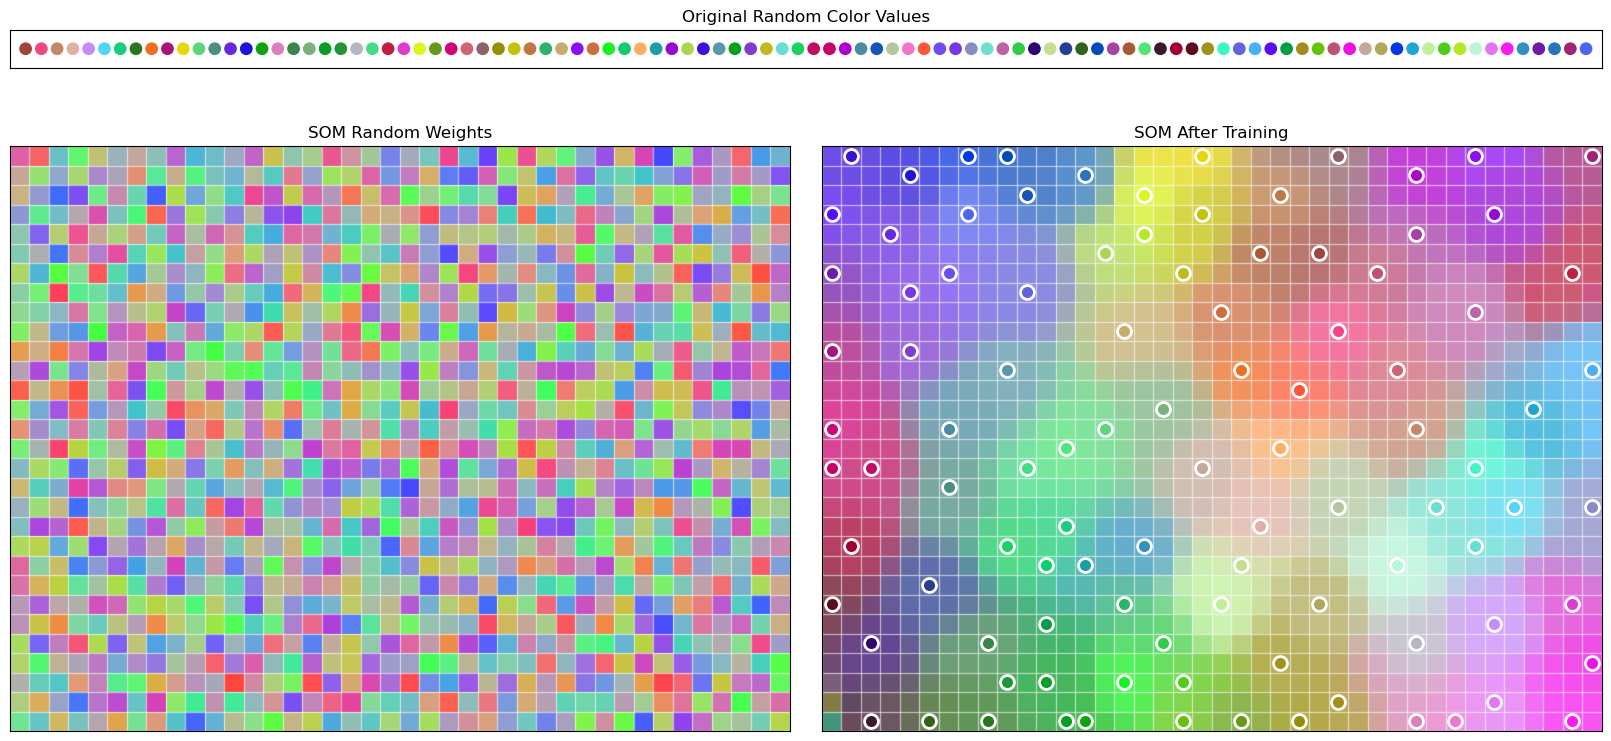

In [13]:

fig, axes = plt.subplot_mosaic([
                            ['two', 'two'],
                            ['left', 'right'],
                            ],
                               figsize=(16,8), 
                         height_ratios=[1,19],
                         constrained_layout=True)

################################
## Plot random color (input data)
################################

ax = axes['two']

sns.scatterplot(random_colors_df, x='index', y=0, 
                palette=random_colors.tolist(), hue='index', 
                ax=ax, legend=False, s=100, edgecolor='white')
ax.set_xticks([])
ax.set_yticks([])
ax.margins(0.01)
ax.set_xlabel("")
ax.set_title("Original Random Color Values")

################################
## Plot random initialized weights
################################


major_ticks = np.arange(0, 41, 5)
minor_ticks = np.arange(0, 41, 1)

ax = axes['left']

ax.imshow(abs(som_colors.get_weights()), interpolation='none', origin="lower", alpha=.75)

ax = tidy_ax(ax, major_ticks, minor_ticks, 30)

ax.set_title("SOM Random Weights")




################################
## Plot trained SOM
################################

som_colors.train(random_colors, 500, random_order=True, verbose=True)

ax = axes['right']

ax.imshow(abs(som_colors.get_weights()), interpolation='none', origin="lower", alpha=.75)

for i in random_colors:
    yx = som_colors.winner(i)

    ax.scatter(yx[1], yx[0], c=[i], edgecolors='white', alpha=1, s=100, linewidth=2)
    


ax = tidy_ax(ax, major_ticks, minor_ticks, 30)
ax.set_title("SOM After Training")
fig.savefig("./../figures/clustering/som_rgb.png")

plt.show()

<div class="alert alert-block alert-warning" style="font-size:22px; ">

**[NOTA]** 

- Na primeira linha o último gráfico não é o melhor porque existem pesos ainda aleatórios que não convergem 
  
</div>   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


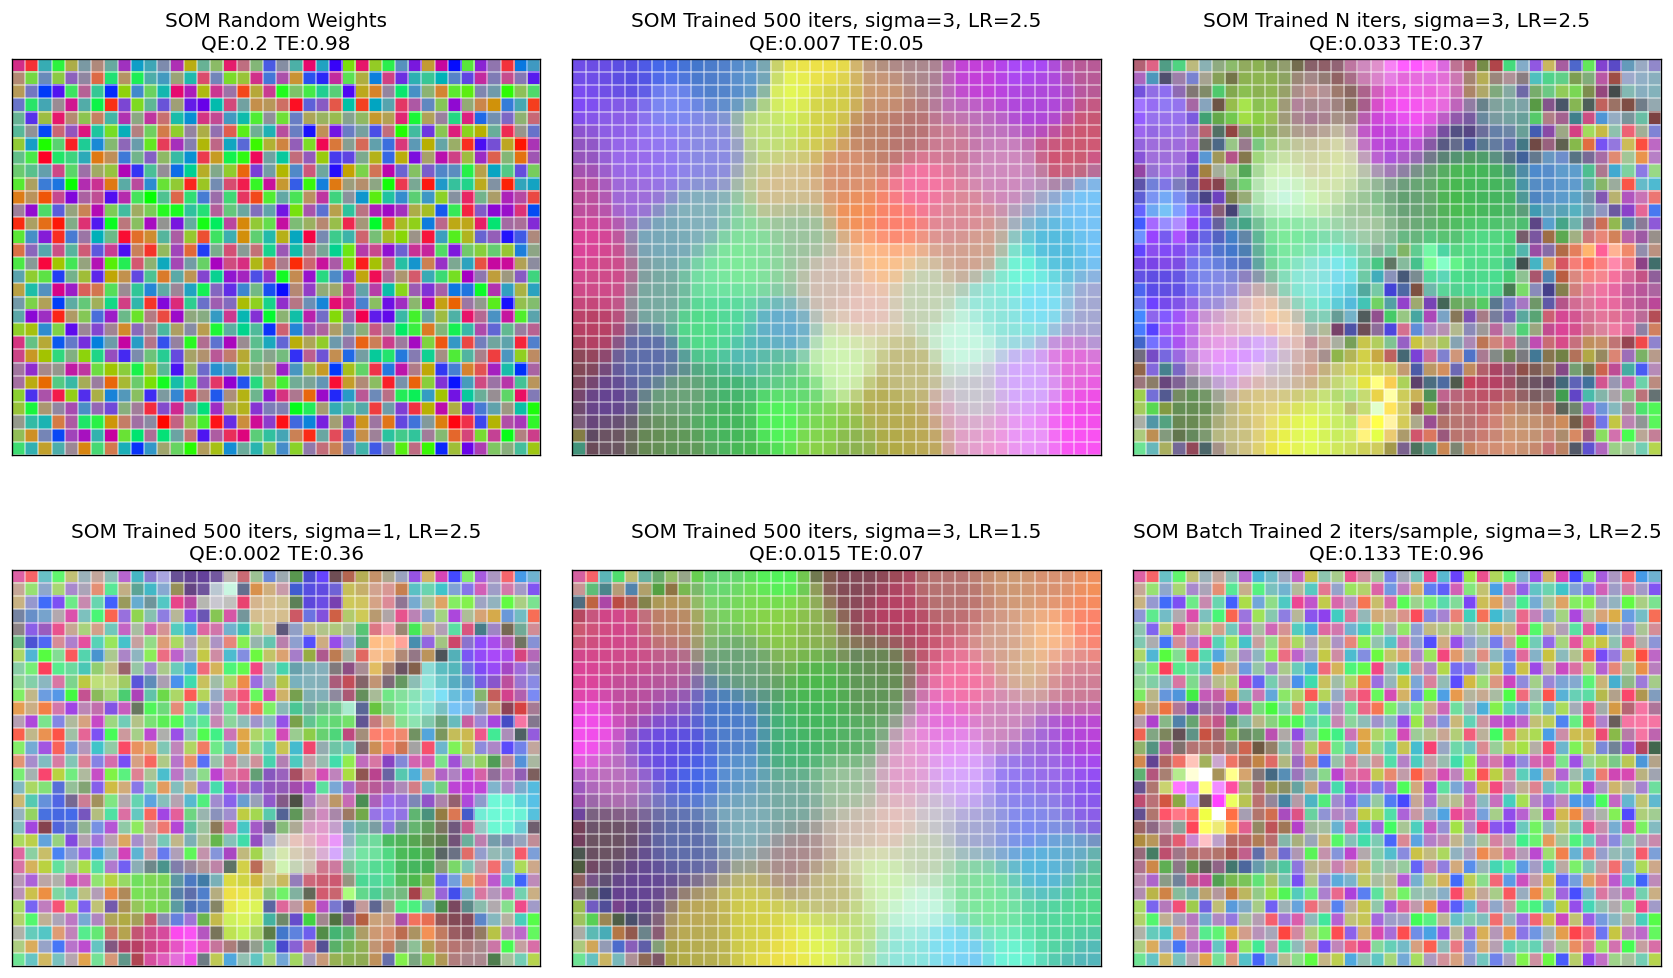

In [14]:

fig, axes = plt.subplots(2,3, figsize=(14,8), 
                        gridspec_kw={'hspace': .15},
                         constrained_layout=True,
                         dpi=120)

colors_dims = (30, 40)
major_ticks = np.arange(0, 41, 5)
minor_ticks = np.arange(0, 41, 1)

################################
## Plot random initialized weights
################################


# Initialize MiniSom

som_c = MiniSom(*colors_dims,          # Size of SOM grid
                 3,                     # Number of features
                 sigma=3.,              # Neighborhood radius
                 learning_rate=2.5,     # Learning rate
                 random_seed=42,        # Random seed
                 neighborhood_function='gaussian' # Neighborhood radius function
                 )

ax = axes[0][0]

ax.imshow(abs(som_c.get_weights()), interpolation='none', origin="lower")
ax = tidy_ax(ax, major_ticks, minor_ticks, 30)
qe = np.round(som_c.quantization_error(random_colors),3)
te = np.round(som_c.topographic_error(random_colors),3)
ax.set_title("SOM Random Weights\nQE:{} TE:{}".format(qe, te))


################################
## Plot trained SOM
################################

ax = axes[0][1]

som_c.train(random_colors, 500, random_order=True, verbose=False)
ax.imshow(abs(som_c.get_weights()), interpolation='none', origin="lower", alpha=.75)
ax = tidy_ax(ax, major_ticks, minor_ticks, 30)
qe = np.round(som_c.quantization_error(random_colors),3)
te = np.round(som_c.topographic_error(random_colors),3)
ax.set_title("SOM Trained 500 iters, sigma=3, LR=2.5\nQE:{} TE:{}".format(qe, te))

ax = axes[0][2]

som_c = MiniSom(*colors_dims,          # Size of SOM grid
                 3,                     # Number of features
                 sigma=3.,              # Neighborhood radius
                 learning_rate=2.5,     # Learning rate
                 random_seed=42,        # Random seed
                 neighborhood_function='gaussian' # Neighborhood radius function
                 )
som_c.train(random_colors, len(random_colors), random_order=True, verbose=False)
ax.imshow(abs(som_c.get_weights()), interpolation='none', origin="lower", alpha=.75)
ax = tidy_ax(ax, major_ticks, minor_ticks, 30)
qe = np.round(som_c.quantization_error(random_colors),3)
te = np.round(som_c.topographic_error(random_colors),3)
ax.set_title("SOM Trained N iters, sigma=3, LR=2.5\nQE:{} TE:{}".format(qe, te))

################################
## Plot trained SOM
################################

ax = axes[1][0]

som_c = MiniSom(*colors_dims,          # Size of SOM grid
                 3,                     # Number of features
                 sigma=1.,              # Neighborhood radius
                 learning_rate=2.5,     # Learning rate
                 random_seed=42,        # Random seed
                 neighborhood_function='gaussian' # Neighborhood radius function
                 )
som_c.train(random_colors, 500, random_order=True, verbose=False)
ax.imshow(abs(som_c.get_weights()), interpolation='none', origin="lower", alpha=.75)
ax = tidy_ax(ax, major_ticks, minor_ticks, 30)
qe = np.round(som_c.quantization_error(random_colors),3)
te = np.round(som_c.topographic_error(random_colors),3)
ax.set_title("SOM Trained 500 iters, sigma=1, LR=2.5\nQE:{} TE:{}".format(qe, te))

################################
## Plot trained SOM
################################

ax = axes[1][1]

som_c = MiniSom(*colors_dims,          # Size of SOM grid
                 3,                     # Number of features
                 sigma=3.,              # Neighborhood radius
                 learning_rate=1.5,     # Learning rate
                 random_seed=42,        # Random seed
                 neighborhood_function='gaussian' # Neighborhood radius function
                 )

som_c.train(random_colors, 500, random_order=True, verbose=False)
ax.imshow(abs(som_c.get_weights()), interpolation='none', origin="lower", alpha=.75)
ax = tidy_ax(ax, major_ticks, minor_ticks, 30)
qe = np.round(som_c.quantization_error(random_colors),3)
te = np.round(som_c.topographic_error(random_colors),3)
ax.set_title("SOM Trained 500 iters, sigma=3, LR=1.5\nQE:{} TE:{}".format(qe, te))

################################
## Plot trained SOM
################################

ax = axes[1][2]

som_c = MiniSom(*colors_dims,          # Size of SOM grid
                 3,                     # Number of features
                 sigma=3.,              # Neighborhood radius
                 learning_rate=2.5,     # Learning rate
                 random_seed=42,        # Random seed
                 neighborhood_function='gaussian' # Neighborhood radius function
                 )
som_c.train(random_colors, 2, random_order=True, verbose=False)
ax.imshow(abs(som_c.get_weights()), interpolation='none', origin="lower", alpha=.75)
ax = tidy_ax(ax, major_ticks, minor_ticks, 30)

qe = np.round(som_c.quantization_error(random_colors),3)
te = np.round(som_c.topographic_error(random_colors),3)
ax.set_title("SOM Batch Trained 2 iters/sample, sigma=3, LR=2.5\nQE:{} TE:{}".format(qe, te))

# fig.savefig("./../figures/clustering/som_demo.png")
plt.show()

<div class="alert alert-block alert-info" style="font-size:17px; ">

## **How to apply Self-Organizing Maps?**

The training of a SOM is **more effective** if it is done in two phases: the unfolding phase, and the fine-tuning phase. 

In the **unfolding phase** the objective is to **spread the units** in the region of the input space where the data patterns are located. In this phase the neighbourhood function should have a large initial radius so that all units have high mobility and the map can quickly cover the input space.

The **fine tuning phase**, as the name implies, is the process of small adjustments in order to **reduce the quantization error**, and centre the units in the areas where the density of patterns is highest. Usually, in this phase the learning rate and the neighbourhood radius are smaller than the ones used in the unfolding phase. As these two parameters are smaller, the map will need more time to adjust its weights and that is why the number of iterations or epochs is normally higher.

</div>

<div class="alert alert-block alert-success" style="font-size:17px; ">

**Exercise**
- Train a SOM with a 10x10 grid (MxN), random initialization, gaussian neighborhood function and hexagonal topology/lattice
- Set training of 100 iterations


Documentation of `train` method:

https://github.com/JustGlowing/minisom/blob/master/minisom.py#L467

</div>

<div class="alert alert-block alert-success" style="font-size:22px; ">

### **Parameters for the SOM (Decidido pela Profª)**

```python	
M = 10
N = 10
neighborhood_function = 'gaussian' 
topology = "hexagonal"
n_feats = len(metric_features)
learning_rate = .7
```

</div>

In [15]:
M = 10
N = 10
neighborhood_function = 'gaussian' 
topology = "hexagonal"
n_feats = len(metric_features)
learning_rate = .7


som_data = df[metric_features].values

sm = MiniSom(M, N,              # 10x10 map size
             n_feats,           # Number of the elements of the vectors in input.
             learning_rate=learning_rate, 
             topology=topology, 
             neighborhood_function=neighborhood_function, 
             activation_distance='euclidean',
             random_seed=42
             )

# Initializes the weights of the SOM picking random samples from data.
sm.random_weights_init(som_data) 


print("Before training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))



# Trains the SOM using all the vectors in data sequentially
# minisom does not distinguish between unfolding and fine tuning phase;

sm.train_batch(som_data, 20000)

print("After training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))



Before training:
QE 1.5345


c:\Anaconda3\envs\DM2425\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


TE 0.9543
After training:
QE 1.316
TE 0.5212


## **Visualizing data with SOMs**

<div class="alert alert-block alert-success" style="font-size:22px; ">

### **Component planes**
What do they represent? What kinds of information do they contain?

Analyse these plots from the following perspectives:
- Feature importance
- Feature correlation (both globally and locally)
- Data distribution
- Outlier detection

</div>

In [16]:
# What are these weights?
weights = sm.get_weights()
weights.shape

(10, 10, 10)

#### **weights.shape**

> **`(10, 10, 10)` $\rightarrow$ 10x10 grid, 10 features/dimensions**

In [17]:
def plot_hexagons(som,              # Trained SOM model 
                  sf,               # matplotlib figure object
                  colornorm,        # colornorm
                  matrix_vals,      # SOM weights or
                  label="",         # title for figure
                  cmap=cm.Grays,    # colormap to use
                  annot=False       
                  ):
    axs = sf.subplots(1,1)
    
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):
            wx, wy = som.convert_map_to_euclidean((i,j)) 
            hex = RegularPolygon((wx, wy), 
                                numVertices=6, 
                                radius= np.sqrt(1/3),
                                facecolor=cmap(colornorm(matrix_vals[i, j])), 
                                alpha=1, 
                                edgecolor='white',
                                linewidth=.5)
            axs.add_patch(hex)
            if annot==True:
                annot_val = np.round(matrix_vals[i,j],2)
                if int(annot_val) == annot_val:
                    annot_val = int(annot_val)
                axs.text(wx,wy, annot_val, 
                        ha='center', va='center', 
                        fontsize='x-small')
                
    ## Remove axes for hex plot
    axs.margins(.05)
    axs.set_aspect('equal')
    axs.axis("off")
    axs.set_title(label)

    # ## Add colorbar
    divider = make_axes_locatable(axs)
    ax_cb = divider.append_axes("right", size="5%", pad="0%")

    ## Create a Mappable object
    cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cmap_sm.set_array([])

    ## Create custom colorbar 
    cb1 = colorbar.Colorbar(ax_cb,
                            orientation='vertical', 
                            alpha=1,
                            mappable=cmap_sm
                            )
    cb1.ax.get_yaxis().labelpad = 6

    # Add colorbar to plot
    sf.add_axes(ax_cb)

    return sf

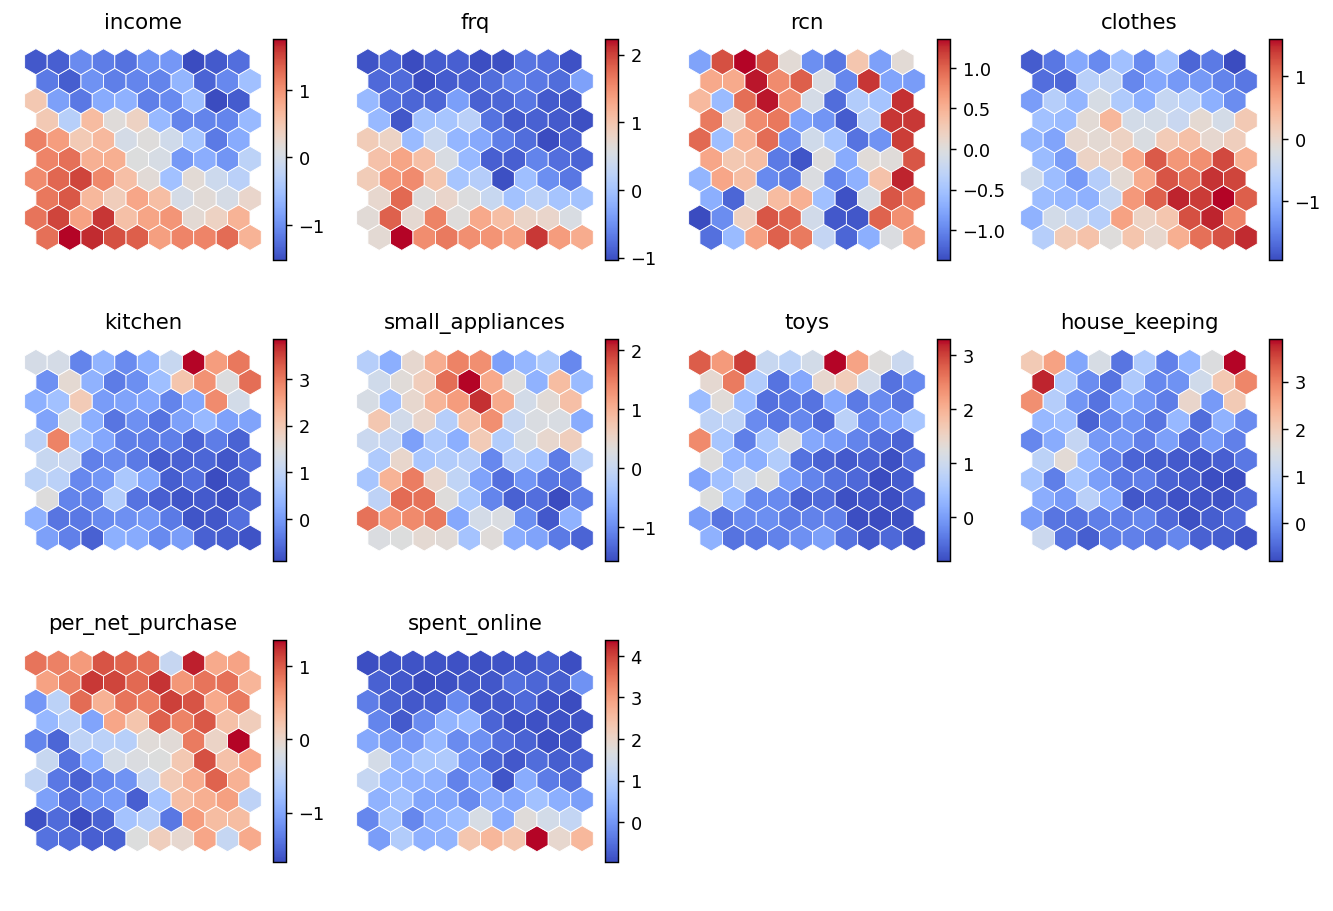

In [18]:
##############################
# Plot Component Planes
##############################

figsize=(10,7)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128, )

subfigs = fig.subfigures(3,4,wspace=.15)

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi, sf in zip(range(len(metric_features)), subfigs.flatten()):
    
    matrix_vals = weights[:,:,cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))
    # colornorm = mpl_colors.CenteredNorm(vcenter=0, halfrange=vext)


    sf = plot_hexagons(sm, sf, 
                    colornorm,
                    matrix_vals,
                    label=metric_features[cpi],
                    cmap=cm.coolwarm,
                    )

<div class="alert alert-block alert" style="font-size:18px">

**[NOTAS]**

- É como se fosse um heatmap, mas com mais de uma dimensão. 
  - Neste caso temos **10 features** (10x10) $\rightarrow$ **100 dimensões**.
- Quanto mais <b><span style="color:red">vermelho</span></b>, maior o valor, e quanto mais <b><span style="color:blue">azul</span></b>, menor o valor.
- Cada hexagono representa um **node** $\rightarrow$ **Best Matching Unit (BMU)**
- Cada hexagono "may have" pontos de dados associados a ele.
  - No **1º Gráfico** os <b><span style="color:red">vermelhos (esq baixo)</span></b> têm mais **`income`** e da parte  <b><span style="color:blue">azul (dir cima)</span></b> têm menos **`income`**.
    - Podemos ainda procurar por **correlações** entre as variáveis. [A forma diagonal no **`income`** e **`frq`** indica que há uma correlação entre elas.] [Ou ainda que as correlações estão "inversas" **`income`** e **`per_net_purchase`**]
  - Podemos ainda procurar por **outliers**.
    - No **`spent_online`** temos um **outlier** <b><span style="color:darkred">vermelho escuro</span></b> no canto inferior direito. [Vemos um valor extremo]
      - Olhando para o mesmo hexagono nos diferentes heatmaps podemos ver que este não um ***outlier*** em mais nenhuma das outras features.
    - No **`kitchen`** temos um **outlier** <b><span style="color:red">vermelho</span></b> no meio da parte esquerda. [Vemos que é um valor extremo pq é diferente dos neighbors]

</div>

---

<div class="alert alert-block alert-warning" style="font-size:22px; ">

**[NOTAS Filipa]** 

- Todos hexágonos para as diferentes variáveis são os mesmos  
- Faz a média da variável em cada unit (onde cada node acaba por ser uma combinação de vários pontos que têm esta unit como BMU)
- Podemos ver se as features são corr. se tiverem padões iguais (income e frq são corr e depois negativamente corr com per_net_purchase)
- **`spent_online`** tem outliers vermelho escuro em baixo

</div>

<div class="alert alert-block alert-success" style="font-size:22px; ">

### **U-matrix**
Encode each neuron in the output space with the **average distance** to its neighbors in the input space.

Analyse these plots from the following perspectives:
- Clusters of units
- Potential outliers (units which are very distant from its neighbors and have low frequency)

</div>

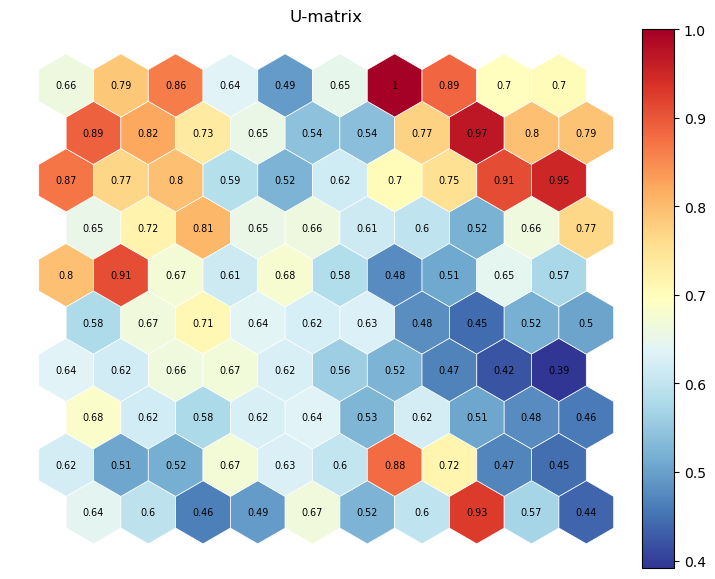

In [19]:
umatrix = sm.distance_map(scaling='mean')
fig = plt.figure(figsize=figsize)

colornorm = mpl_colors.Normalize(vmin=np.min(umatrix), vmax=np.max(umatrix))

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    umatrix,
                    label="U-matrix",
                    cmap=cm.RdYlBu_r,
                    annot=True
                    )

<div class="alert alert-block alert-" style="font-size:22px; ">

### **[NOTAS]**

- As distâncias são calculadas entre os **BMUs** e os seus **viziinhos**.
- As distâncias estão **normalizadas**.
- Quanto mais <b><span style="color:red">vermelho</span></b>, maior a distância, e quanto mais <b><span style="color:blue">azul</span></b>, menor a distância.
- Os **outliers** são os hexagonos que estão <b><span style="color:darkred">vermelhos escuros</span></b> e rodeados de <b><span style="color:blue">azul</span></b> ou <b><span style="color:darkblue">azul escuro</span></b> e rodeados de <b><span style="color:red">vermelho</span></b>.
- ***Como é que identificamos *clusters*?***
  - Vemos os grupos que têm cores semelhantes.
    - Na parte **esq baixo** vemos os azuis, e têm como limite os **amarelados**.
    - Na parte **dir cima** vemos os vermelhos, e têm como limite os **amarelados**.
    - Na parte **dir baixo** vemos os azuis, e têm como limite os **vermelhos**.

> **This is not a output space, but a *representation of the input space*.**

</div>


----

<div class="alert alert-block alert-warning" style="font-size:22px; ">

**[NOTAS Filipa]**
- Estamos a olhar para as units e quanto mais <b><span style="color:blue">azul</span></b> escuro mais perto está dos seus vizinhos; entre clusters queremos longe, dentro do cluster queremos perto
- Ela separou os <b><span style="color:blue">azuis</span></b> do canto esquerdo e do canto direito
- a concentração de pontos (obs) irá coincidir com a concentração de units

</div>

In [20]:
## Flip and rotate to match plot
print(np.flip(np.round(umatrix,2), axis=1).T)

[[0.66 0.79 0.86 0.64 0.49 0.65 1.   0.89 0.7  0.7 ]
 [0.89 0.82 0.73 0.65 0.54 0.54 0.77 0.97 0.8  0.79]
 [0.87 0.77 0.8  0.59 0.52 0.62 0.7  0.75 0.91 0.95]
 [0.65 0.72 0.81 0.65 0.66 0.61 0.6  0.52 0.66 0.77]
 [0.8  0.91 0.67 0.61 0.68 0.58 0.48 0.51 0.65 0.57]
 [0.58 0.67 0.71 0.64 0.62 0.63 0.48 0.45 0.52 0.5 ]
 [0.64 0.62 0.66 0.67 0.62 0.56 0.52 0.47 0.42 0.39]
 [0.68 0.62 0.58 0.62 0.64 0.53 0.62 0.51 0.48 0.46]
 [0.62 0.51 0.52 0.67 0.63 0.6  0.88 0.72 0.47 0.45]
 [0.64 0.6  0.46 0.49 0.67 0.52 0.6  0.93 0.57 0.44]]


<div class="alert alert-block alert-success" style="font-size:22px; ">

### **Hit-map**
Show the **frequency** of each Unit in the output map
</div>

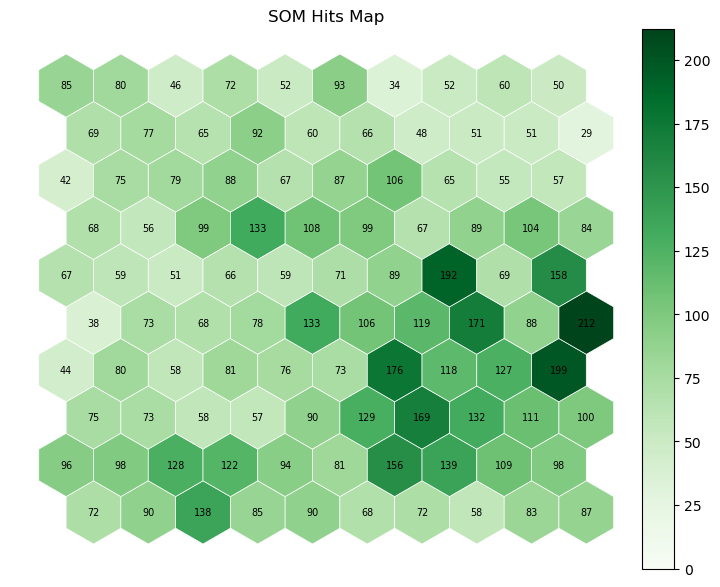

In [21]:
hitsmatrix = sm.activation_response(df[metric_features].values)


fig = plt.figure(figsize=figsize)

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(hitsmatrix))

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    hitsmatrix,
                    label="SOM Hits Map",
                    cmap=cm.Greens,
                    annot=True
                    )


<div class="alert alert-block alert-" style="font-size:22px; ">

- More <b><span style="color:darkgreen">verde escuro</span></b> $\rightarrow$ mais pontos de dados associados a esse hexagono.
- More <b><span style="color:lightgreen">verde claro</span></b> $\rightarrow$ menos pontos de dados associados a esse hexagono.

> Podemos ver que há **$58$** pontos de dados associados aos ***outliers*** que vimos no **Component planes** [***`spent_online`***]

</div>

In [22]:
## Values of HITS:
## Flip and rotate to match plot
np.flip(np.round(hitsmatrix,2), axis=1).T


array([[ 85.,  80.,  46.,  72.,  52.,  93.,  34.,  52.,  60.,  50.],
       [ 69.,  77.,  65.,  92.,  60.,  66.,  48.,  51.,  51.,  29.],
       [ 42.,  75.,  79.,  88.,  67.,  87., 106.,  65.,  55.,  57.],
       [ 68.,  56.,  99., 133., 108.,  99.,  67.,  89., 104.,  84.],
       [ 67.,  59.,  51.,  66.,  59.,  71.,  89., 192.,  69., 158.],
       [ 38.,  73.,  68.,  78., 133., 106., 119., 171.,  88., 212.],
       [ 44.,  80.,  58.,  81.,  76.,  73., 176., 118., 127., 199.],
       [ 75.,  73.,  58.,  57.,  90., 129., 169., 132., 111., 100.],
       [ 96.,  98., 128., 122.,  94.,  81., 156., 139., 109.,  98.],
       [ 72.,  90., 138.,  85.,  90.,  68.,  72.,  58.,  83.,  87.]])

In [23]:
sm.quantization_error(df[metric_features].values)

1.3160085933160983

<div class="alert alert-block alert-success" style="font-size:22px; ">

## **Clustering with SOMs: K-means SOM vs Emergent SOM**
- In **k-means SOM**, the *number of units should be equal to the expected number of clusters*, and thus each cluster should be represented by a single unit. 
- In **emergent SOM**, a very *large number of units is used*. These very large SOM allow for very clear U-Matrices and are useful for detecting quite clearly the underlying structure of the data. This technique can be **used together with other clustering algorithms**.

</div>

<div class="alert alert-block alert-success" style="font-size:17px; ">

**Exercise**
- Train a SOM with a 50x50 grid, random initialization, gaussian neighborhood function and hexagonal topology/lattice
- Set an unfolding phase and a fine tuning phase of 100 iterations

</div>

In [36]:
# M = 50
# N = 50


# 50 takes too long to run
M = 20 # horizontal dimension
N = 30 # vertical dimension
neighborhood_function = 'gaussian' 
topology = 'hexagonal' 
n_feats = len(metric_features)
learning_rate = .7


som_data = df[metric_features].values

sm = MiniSom(M, N,              # 10x10 map size
             n_feats,           # Number of the elements of the vectors in input.
             learning_rate=learning_rate, 
             topology=topology, 
             neighborhood_function=neighborhood_function, 
             activation_distance='euclidean',
             random_seed=42
             )


som_data = df[metric_features].values

# Initializes the weights of the SOM picking random samples from data.
sm.random_weights_init(som_data) 

print(np.round(sm.quantization_error(som_data),4), "Starting QE")
print(np.round(sm.topographic_error(som_data),4), "Starting TE")


# Trains the SOM using all the vectors in data sequentially
# minisom does not distinguish between unfolding and fine tuning phase;

sm.train_batch(som_data, 500000)
print(np.round(sm.quantization_error(som_data),4),"Ending QE")
print(np.round(sm.topographic_error(som_data),4),"Ending TE")


c:\Anaconda3\envs\DM2425\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


1.0719 Starting QE
0.9917 Starting TE
0.9161 Ending QE
0.651 Ending TE


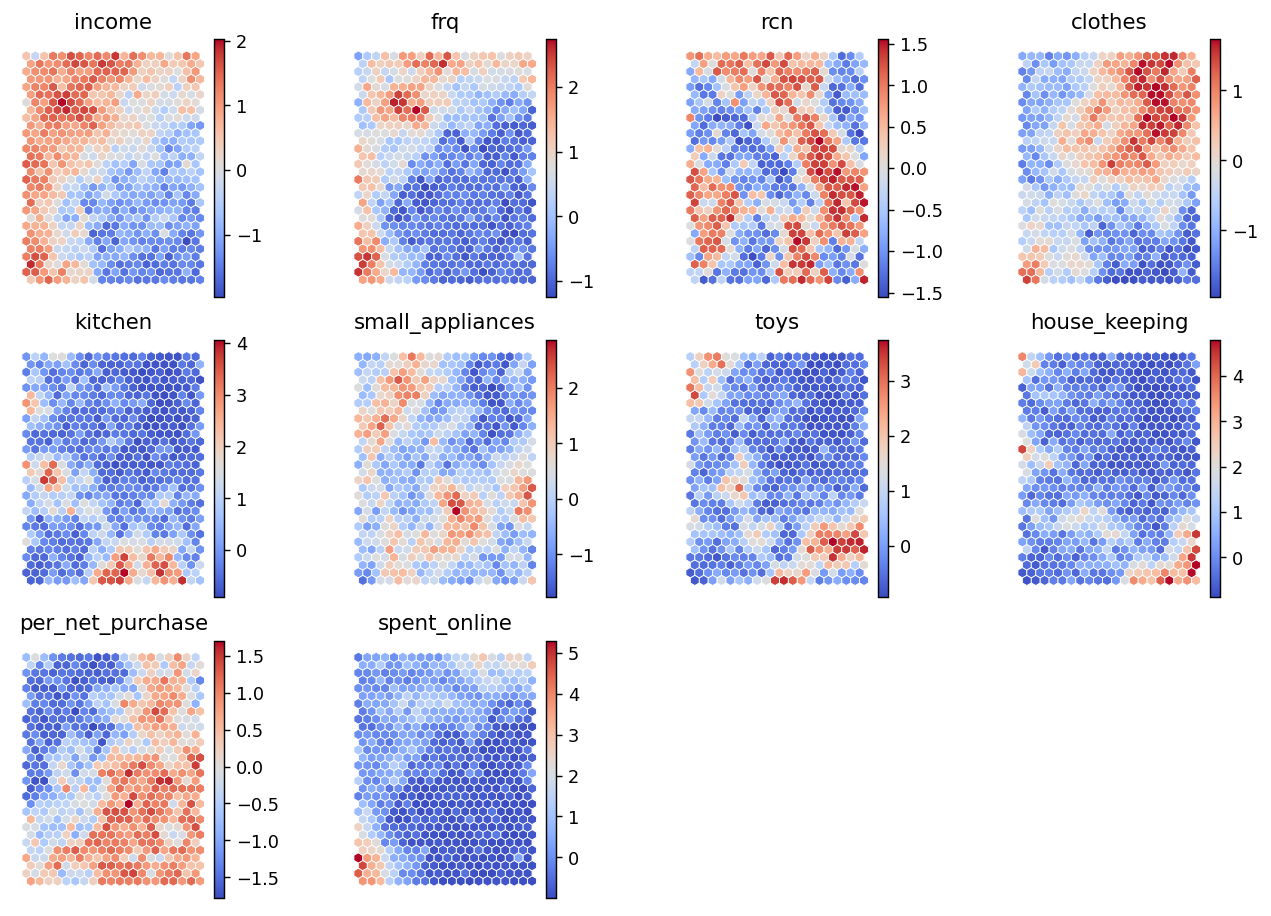

In [37]:
##############################
# Plot Component Planes
##############################

weights = sm.get_weights()

figsize=(10,7)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128, )

subfigs = fig.subfigures(3,4,wspace=.15)

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi, sf in zip(range(len(metric_features)), subfigs.flatten()):
    
    matrix_vals = weights[:,:,cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))


    sf = plot_hexagons(sm, sf, 
                    colornorm,
                    matrix_vals,
                    label=metric_features[cpi],
                    cmap=cm.coolwarm,
                    )

<div class="alert alert-block alert-warning" style="font-size:22px; ">

### **[NOTAS]**

- Disse que U-matrix e SOM têm copmportamentos iguais

</div>

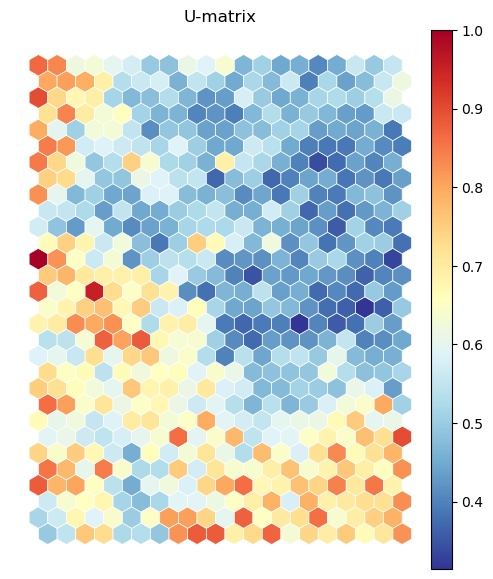

In [38]:
umatrix = sm.distance_map(scaling='mean')
fig = plt.figure(figsize=figsize)

colornorm = mpl_colors.Normalize(vmin=np.min(umatrix), vmax=np.max(umatrix))

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    umatrix,
                    label="U-matrix",
                    cmap=cm.RdYlBu_r,
                    )

<div class="alert alert-block alert-warning" style="font-size:22px; ">

### **[NOTAS]**

> [Não disse nada]

</div>

In [39]:
umatrix.shape

(20, 30)

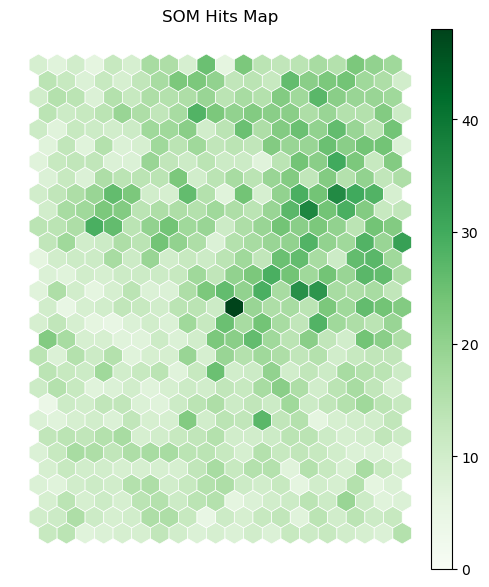

In [40]:
hitsmatrix = sm.activation_response(df[metric_features].values)


fig = plt.figure(figsize=figsize)

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(hitsmatrix))

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    hitsmatrix,
                    label="SOM Hits Map",
                    cmap=cm.Greens,
                    )


<div class="alert alert-block alert-warning" style="font-size:22px; ">

### **[NOTAS]**

> [Não disse nada] ??????????

</div>

<div class="alert alert-block alert-success" style="font-size:22px; ">

Now we can have a better idea of how the input space look like in terms of distances.

</div>

### **K-Means on top of SOM units**
- Define number of clusters to retain

In [41]:
# Exercise:
# Do the Inertia plot here (check last class' notebook)

In [46]:
M, N,len(metric_features)

(20, 30, 10)

<div class="alert alert-block alert-danger" style="font-size:22px; ">

> ***Kmeans*** expected **`n_clusters`** $\rightarrow$ **`n_units`** [Daí termos de **reshape**]

- ***Kmeans*** não conhece o conceito de mapas; já predefiniu o nr de clusters

In [42]:
weights_flat = sm.get_weights().reshape((M*N),len(metric_features))
weights_flat.shape

(600, 10)

In [43]:
# Perform K-Means clustering on top of the MxN units (sm.get_node_vectors() output)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(weights_flat)
nodeclus_labels

c:\Anaconda3\envs\DM2425\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       0, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 3, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 0,

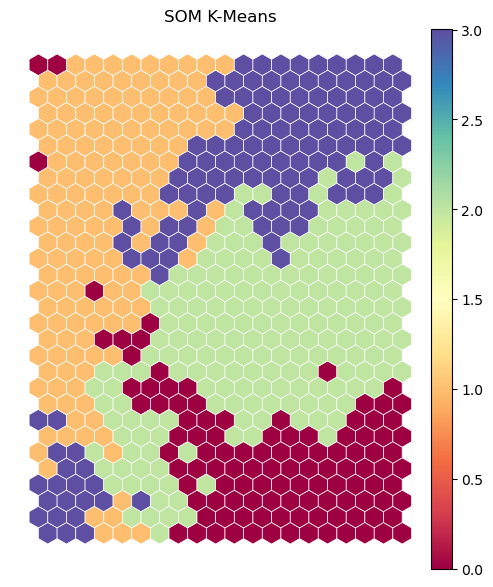

In [44]:
kmeans_matrix = nodeclus_labels.reshape((M,N))

fig = plt.figure(figsize=figsize)

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(kmeans_matrix))

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    kmeans_matrix,
                    label="SOM K-Means",
                    cmap=cm.Spectral,
                    )


<div class="alert alert-block alert-danger" style="font-size:22px; ">

### **[NOTAS]**

> Provavelmente o **SOM** não está "unfolded" o suficiente para que o **Kmeans** funcione bem.

> Porquê que as cores não estão separadas e tenho <b><span style="color:purple">roxos</span></b> em 2 sítios? Porque o mapa não está unfolded.

- Isto quer dizer que o **SOM** não está bem treinado. [O **SOM** não está a representar bem o espaço de input.]
- **[VIDEO - Simulation .... Part 2]**

</div>


<div class="alert alert-block alert-success" style="font-size:22px; ">

### **Hierarchical Clustering on top of SOM units**
- Define best linkage method
- Define number of clusters to retain

</div>

In [33]:
# Exercise:
# Do the R² plot here and the Dendrogram (check last class' notebook)



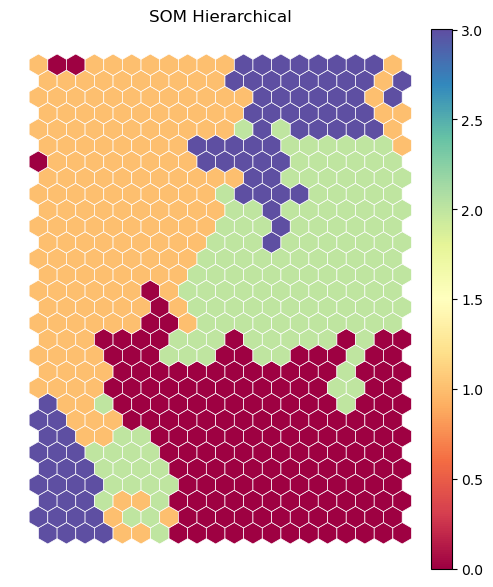

In [34]:
# Perform Hierarchical clustering on top of the MxN units 

hierclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
nodeclus_labels = hierclust.fit_predict(weights_flat)
hclust_matrix = nodeclus_labels.reshape((M,N))

fig = plt.figure(figsize=figsize)

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(hclust_matrix))

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    hclust_matrix,
                    label="SOM Hierarchical",
                    cmap=cm.Spectral,
                    )

<div class="alert alert-block alert-success" style="font-size:25px; ">

Os resultados são um pouco diferentes, mas nada de especial

</div>

### **Final SOM Clustering solution**

In [47]:
# Check the nodes and and respective clusters
nodes = weights_flat

df_nodes = pd.DataFrame(nodes, columns=metric_features)
df_nodes['label'] = nodeclus_labels
df_nodes

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online,label
0,0.462977,1.656519,-0.316157,1.460613,-0.624204,-1.384355,-0.796830,-0.775239,0.758566,3.785364,3
1,1.505936,2.548785,-0.323244,1.148406,-0.637608,-0.883721,-0.757939,-0.691021,0.198526,4.542545,3
2,1.876306,2.479730,1.160103,0.780834,-0.553445,-0.535566,-0.555417,-0.469812,0.297981,4.810621,3
3,1.272462,2.338511,-0.579203,0.325586,-0.156246,-0.139312,-0.447039,-0.204546,0.707884,5.304979,3
4,1.253768,1.789676,-0.338992,-0.282728,-0.319795,-0.407282,0.512674,1.411552,-0.321870,2.650361,1
...,...,...,...,...,...,...,...,...,...,...,...
595,0.496471,0.799578,-1.294323,1.012604,-0.366534,-1.006346,-0.665877,-0.472294,-0.470778,0.984355,3
596,0.713272,1.422669,-1.046189,1.261947,-0.821266,-0.914459,-0.829826,-0.755960,-1.295709,0.647462,3
597,1.027890,0.695093,-0.380353,1.040648,-0.563004,-0.806625,-0.649987,-0.722706,0.128906,1.457042,3
598,0.489401,1.582194,-0.665021,0.306707,0.356690,-0.797812,-0.253004,0.303655,0.010951,2.719654,3


In [48]:
## This gets BMU coordinates, e.g. (4,4) for each data point
bmu_index = np.array([sm.winner(x) for x in df[metric_features].values])

print(bmu_index.shape)

bmu_index

(8817, 2)


array([[ 7, 29],
       [ 4, 19],
       [ 8,  9],
       ...,
       [11, 13],
       [ 2,  8],
       [ 2,  1]], dtype=int64)

<div class="alert alert-block alert-success" style="font-size:22px; ">

> Ela só está a associar os pontos de dados aos hexagonos **[LeftJoin??]**

</div>

In [ ]:
## This gets the cluster label from hclust_matrix, i.e.
## if data row 0 has BMU at (37, 28) 
## it will get the label associated to node (37,28) using label associated to hclust_matrix[37,28] above

som_final_labels = [hclust_matrix[i[0]][i[1]] for i in bmu_index]


In [50]:
df_final = pd.concat([
                df,
                pd.Series(som_final_labels, name='label', index=df.index)
            ], axis=1
            )

df_final

,age,income,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,...,oh_gender_M,oh_dependents_1.0,oh_description_Kind of OK,oh_description_Meh...,oh_description_OK nice!,oh_description_Take my money!!,PC0,PC1,PC2,label
0,78,0.743162,1.191605,0.457819,1402,-0.617023,-0.243065,1.216847,0.495837,-0.499274,...,1.0,0.0,0.0,0.0,0.0,1.0,0.896356,-1.937697,1.120781,1
1,88,1.559488,1.100011,-1.535723,1537,0.166160,-0.790228,0.740464,-0.374374,-0.631907,...,0.0,0.0,0.0,0.0,0.0,1.0,1.981092,-1.421498,0.785625,1
2,34,-1.548542,-0.823463,0.557496,44,-0.834573,1.672006,-0.371096,-0.809480,2.286023,...,1.0,1.0,1.0,0.0,0.0,0.0,-2.813108,0.381440,-0.780867,0
3,69,0.845528,0.550447,-1.402820,888,0.383710,0.440889,-0.768082,-0.084304,-0.234007,...,0.0,1.0,0.0,0.0,1.0,0.0,1.247013,-0.514177,-1.302203,1
4,69,0.782435,1.008417,-0.871209,1138,0.340200,-0.243065,-0.053508,-0.374374,-0.366640,...,0.0,1.0,0.0,0.0,0.0,1.0,1.781920,-0.704805,-0.443376,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8812,70,0.618993,0.458853,-1.701851,837,0.209670,0.167308,-0.132905,0.205767,-0.764540,...,1.0,1.0,1.0,0.0,0.0,0.0,1.162525,-0.372854,-0.982963,1
8813,64,0.874744,0.733635,-1.701851,896,0.731791,-0.243065,-0.609288,-0.519409,-0.366640,...,0.0,1.0,0.0,0.0,0.0,1.0,2.003026,0.083121,-1.428619,3
8814,49,-0.455617,-0.731869,-1.535723,61,0.079139,-0.106274,-0.053508,0.060732,-0.101374,...,1.0,1.0,0.0,1.0,0.0,0.0,-1.002171,1.301747,-0.423851,2
8815,38,-0.596155,0.825229,0.657173,1011,-0.442982,0.577680,0.581670,-0.809480,0.561792,...,1.0,0.0,0.0,0.0,0.0,1.0,0.130573,-0.959962,0.332242,1


In [51]:
# Characterizing the final clusters
df_final[metric_features+['label']].groupby('label').mean()

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online
label,,,,,,,,,,
0,-1.085224,-0.838549,0.087318,-1.106544,0.925875,0.435914,0.933353,0.894931,0.732995,-0.773780
1,1.019263,0.943700,-0.171608,-0.301408,0.098130,0.412406,0.069741,0.073667,-1.170952,0.366963
2,-0.405004,-0.646842,-0.012082,0.654857,-0.519598,-0.340117,-0.497147,-0.470743,0.476753,-0.487240
3,0.556828,0.861679,0.240470,0.921098,-0.517290,-0.782479,-0.521459,-0.527383,0.159467,1.585622


<div class="alert alert-block alert-success" style="font-size:22px; ">

Para comparar qual é o melhor o **K-Means** feito na outra aula ou o **SOM**

</div>

## **Analysing the appropriateness of our solution**
### **R²**

In [52]:
# using R²
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_final[metric_features])  # get total sum of squares
ssw_labels = df_final[metric_features + ["label"]].groupby(by='label').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
r2

C:\Users\André Silvestre\AppData\Local\Temp\ipykernel_24616\1206687926.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_final[metric_features + ["label"]].groupby(by='label').apply(get_ss)  # compute ssw for each cluster labels


0.43477058096976073

### **Quantization error:**
The quantization error is given by the average distance between a unit and the data points mapped to it i.e. all the input data points that share it as BMU.

$$q_e = \frac{\sum_{i=0}^{N_e}||x_i - w_e||}{N_e}$$

$$Q = \frac{\sum_{e=0}^Eq_e}{E}$$
, where:

$Q$ is the overall quantization error of SOM,

$q_e$ is the quantization error for unit $e$,

$x_i$ is a data point/ observation,

$w_e$ is the unit $e$ representation in the input space,

$N_e$ is number of data points mapped to unit $e$,

$E$ is the number of units in the SOM grid

In [53]:
sm.quantization_error(som_data)

0.9160911462113794

<div class="alert alert-block alert-warning" style="font-size:22px; ">

**[NOTA]**

> *Nada*

### Topographic error:

> 
> Returns the topographic error computed by finding
> the __best-matching and second-best-matching neuron__ in the map
> for each input and then evaluating the positions.
>
> A sample for which these two nodes are not adjacent counts as
> an error. The topographic error is given by the
> the total number of errors divided by the total of samples.
> 
> If the topographic error is 0, no error occurred.
> If 1, the topology was not preserved for any of the samples
> 

https://github.com/JustGlowing/minisom/blob/master/minisom.py#L650


<div class="alert alert-block alert-warning" style="font-size:22px; ">

**[NOTA]**

> Cada ponto ele vai encontrar o melhor e o segundo melhor hexagono. O objetivo é que eles estejam perto.

> Procura BMU e 2-BMU para cada ponto, se o mapa estiver unfolded o BMU e 2-BMU devem estar perto. COnta o número de vezes onde BMU e 2-BMU não estão perto Quanto maior,pior é o meu clustering e explica a razão pela qual o roxo estava longe um do outro -> number of it costuma ser o que resolve este problema.
Por default usa decay function: inverse_decay_to_zero, linear_decay...

> Se for $0$ é pq a topologia foi preservada | Se for $1$ é pq a topologia não foi preservada. ***[Não tenho a certeza se é isto]***

</div>

In [54]:
sm.topographic_error(som_data)


0.6510150844958602

---